# Reading in files 

So you have done an experiment and have a file full of data, now we need to read or import that data into python to do stuff with it.

In [2]:
#First we import a few packages we will need 
import numpy as np               # for dealing with math
import pandas as pd              # for tables
import matplotlib.pyplot as plt  # for plotting
%matplotlib inline

In [6]:
#dataTable = pd.read_csv('ExpData.txt')

#dataTable = pd.read_csv('ExpData.txt',sep='\t') # Adding a separation 

dataTable = pd.read_csv('ExpData.txt',sep='\t',header=1) # Setting what row to read as our heading
dataTable.columns = ["t", "v", "v1"] # renaming columns headings

dataTable # printing the table

,t,v,v1
0,0.00,-0.01,-0.03
1,0.00,-0.01,-0.02
2,0.00,-0.01,-0.02
3,0.00,-0.03,-0.02
4,0.00,-0.01,-0.02
...,...,...,...
120695,60.35,-0.25,-0.26
120696,60.35,-0.25,-0.26
120697,60.35,-0.25,-0.26
120698,60.35,-0.25,-0.26


In [7]:
# If I don't want one of the columns, I can just resave the table excluding the column I don't care about.
dataTable = dataTable[["t", "v"]]
dataTable

,t,v
0,0.00,-0.01
1,0.00,-0.01
2,0.00,-0.01
3,0.00,-0.03
4,0.00,-0.01
...,...,...
120695,60.35,-0.25
120696,60.35,-0.25
120697,60.35,-0.25
120698,60.35,-0.25


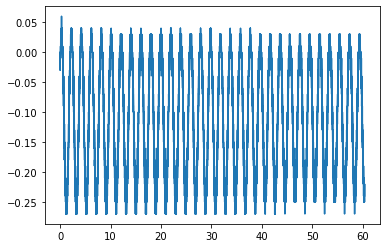

In [8]:
# A quick and dirty plot of our data
plt.plot(dataTable.t,dataTable.v)

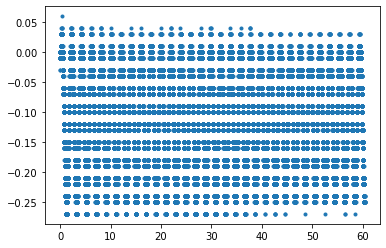

In [9]:
#another look using dots instead of lines
plt.plot(dataTable.t,dataTable.v,'.')

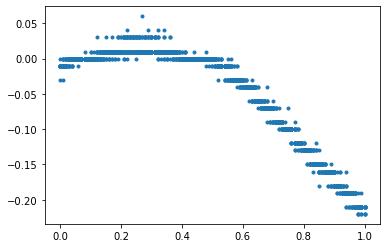

In [10]:
#lets look at a subsection of the data
start = 0
end = 2000
plt.plot(dataTable.t[start:end],dataTable.v[start:end],'.')

It looks like our data needs some cleaning up, for every time value there is not a unique voltage.
So lets try fix this, I google search "pandas merge values if column is same", google does't care about proper grammer.

This turns up this page:
https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func

Which brings to our attention the aggregate and groupby functions. From here we could look them up in the pandas documentaion but I will insted try my luck using the example as a base.

In [12]:
#aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
#df_new = df.groupby(df['id']).aggregate(aggregation_functions)

#fixedTable = dataTable.groupby(dataTable['t']).aggregate({'v':'mean'})
fixedTable = dataTable.groupby(dataTable['t'],as_index=False).aggregate({'v':'mean'}) # We dont want to use t as an index
fixedTable

,t,v
0,0.00,-0.010909
1,0.01,-0.009000
2,0.02,-0.005789
3,0.03,-0.002500
4,0.04,-0.002000
...,...,...
6031,60.31,-0.245238
6032,60.32,-0.244737
6033,60.33,-0.246667
6034,60.34,-0.244211


Another issue with our data is that it is not centered around 0 volts

In [13]:
#Getting rid of the zero offset
print(fixedTable.v.mean())
fixedTable.v = fixedTable.v - fixedTable.v.mean()
fixedTable

-0.11305036955679153


,t,v
0,0.00,0.102141
1,0.01,0.104050
2,0.02,0.107261
3,0.03,0.110550
4,0.04,0.111050
...,...,...
6031,60.31,-0.132188
6032,60.32,-0.131686
6033,60.33,-0.133616
6034,60.34,-0.131160


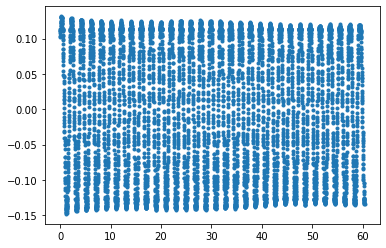

In [14]:
plt.plot(fixedTable.t,fixedTable.v,'.')

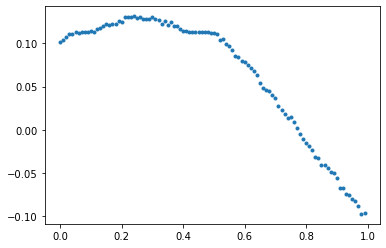

In [15]:
# viewing the same section from earlier
start = 0
end = 2000//20 # // is divide and round down, useful when the variable needs to be an integer
plt.plot(fixedTable.t[start:end],fixedTable.v[start:end],'.')

# Fitting to the data

Lets say we wanted to get the frequency of this. <br>
We are expecting a Sine or Cosine, so we google: "python fit sine to data"
And get https://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html
Which just so happens to have a perfect example

[-0.02103864  3.02098992]


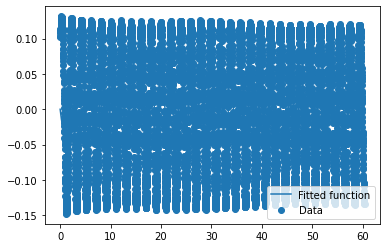

In [16]:
#set our data to the copy pasted labels
x_data = fixedTable.t
y_data = fixedTable.v

# everything below here is copy pasted
from scipy import optimize
def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[0.1, 3]) #tweaked the initial guess (p0) values

print(params)


plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function')

plt.legend(loc='best')

plt.show()

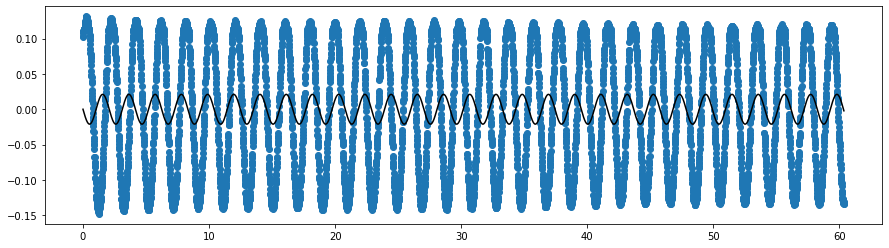

In [17]:
# We cant see anything so let's modify the plot

plt.figure(figsize=(15, 4)) #increase horizontal width
plt.scatter(x_data, y_data, label='Data')

plt.plot(x_data, test_func(x_data, params[0], params[1]), "k", label='Fitted function') #make the line black

#plt.legend(loc='best')

plt.show()

The fit does't seem to be working.

There could be a few reasons:
- The data is too noisy
- The initial guesses are too far from the true value
- The function we are fitting with is not right


Turns out the issue is fitting a periodic function to a not neatly wraping data causes issues. So we will trim our data to see if that works.

In [18]:
pd.options.display.max_rows = 500 # lets us see more (500) pandas rows
fixedTable[:500]

,t,v
0,0.00,0.102141
1,0.01,0.104050
2,0.02,0.107261
3,0.03,0.110550
4,0.04,0.111050
5,0.05,0.113050
6,0.06,0.112550
7,0.07,0.113050
8,0.08,0.113550
9,0.09,0.113050


To trim our data so that it starts at 0 volts we need to find an index with a voltage near 0.

In [19]:
fixedTable[abs(fixedTable.v) < 0.01] 
# this gives us a list of all data points with absolute value less than 0.01 which is close enough to zero for our purposes

,t,v
76,0.76,0.009050
77,0.77,0.001550
78,0.78,-0.004844
173,1.73,-0.007950
174,1.74,-0.002950
175,1.75,0.006384
274,2.74,0.003550
275,2.75,-0.003265
276,2.76,-0.007950
370,3.70,-0.009950


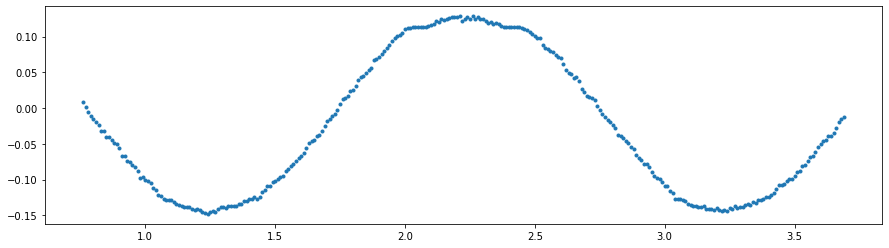

In [20]:
trimmedTable = fixedTable[76:370] # we pick some zeros to start and end out data at

plt.figure(figsize=(15, 4))
plt.plot(trimmedTable.t,trimmedTable.v,'.') # plot our data to see if it worked

[ 0.14061509  3.17712806 -0.83975256]


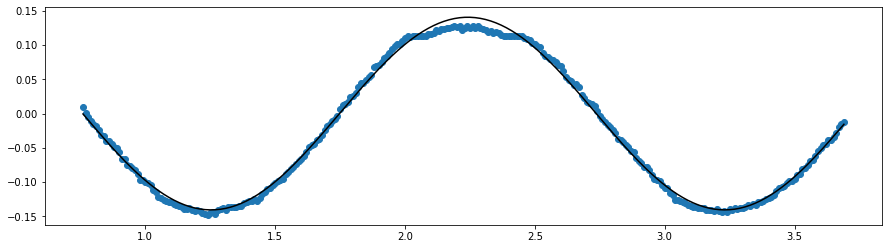

In [21]:
x_data = trimmedTable.t
y_data = trimmedTable.v

from scipy import optimize
def test_func(x, a, b , c):
    return a * np.cos(b * x + c) #added one more parameter to account for the x shift

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[max(trimmedTable.v), 3, 1])
# give it some decent starting parameters

print(params)

plt.figure(figsize=(15, 4)) #increase horizontal width
plt.scatter(x_data, y_data, label='Data')

plt.plot(x_data, test_func(x_data, params[0], params[1], params[2]), "k", label='Fitted function')

plt.show()

a = Amplitude <br>
b = Frequency <br>
c = Offset

**Homework**

1. Import the CurrentVoltage excel file, plot it and fit a curve to it.
2. Try using the Seaborn Package to plot either data set

In [23]:
params_covariance

array([[ 2.51316939e-07,  3.74815426e-07, -8.29274718e-07],
       [ 3.74815426e-07,  1.70940294e-05, -3.77435163e-05],
       [-8.29274718e-07, -3.77435163e-05,  9.58538781e-05]])